<a href="https://colab.research.google.com/github/juanalverto/BostonHousingPrice_Keras/blob/main/BostonHousingPrice_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Boston Housing Price dataset**

Con esta base de datos, nuestro objetivo será el de predecir el precio promedio de casas de un suburbio de Boston de mediados de los 70's, de acuerdo a características tales como la tasa de crímines, impuestos, concentración de óxido nítrico, etcétera.<br>
**Un problema de predicción consiste en obtener valores en una escala continua.**<br> Para entender este concepto, imaginemos que nos piden que cada uno de nosotros dé su predicción acerca de la temperatura actual. Algún compañero podría decir: 25°C, alguien más podría estimar que la temperatura es de 19.5°, otro hará una estimación de 22°C, etc. El punto es que las predicciones pueden tener cualquier valor, no nos estamos limitando a un rango o valor particular, puede ser un valor entero o un valor con decimales. Este comportamiento representa una caso de predicción de valores en una escala continua.<br>
 En el caso del problema del Boston Housing Price dataset, sólo se va a predecir un valor por cada casa, en este caso, el precio de cada casa en cuestión. En machine learning, la tarea de predecir valores en una escala continua se conoce como **regresión**.<br>
La base de datos Boston Housing Price se compone únicamente de 506 instancias, de las cuales, 404 corresponden al conjunto de entrenamiento y 102 al conjunto de prueba. Otra propiedad peculiar de esta base de datos, consiste en que los atributos de los datos de entrada están definidos en diferentes escalas. Por ejemplo, algunas características tienes valores entre 0 y 1, otras entre 1 y 12, otras entre 0 y 100, etcétera.<br>
Keras tiene precargada esta base de datos:


In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

Las 13 características o atributos de los datos de entrada, se enlistan a continuación: <br>

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

In [ ]:
train_data[9] #Atributos de la casa con el índice 9 del conjunto de entrenamiento

array([  1.62864,   0.     ,  21.89   ,   0.     ,   0.624  ,   5.019  ,
       100.     ,   1.4394 ,   4.     , 437.     ,  21.2    , 396.9    ,
        34.41   ])

In [ ]:
len(train_data[9]) #Número de atributos de la casa con el índice 9 del conjunto de entrenamiento

13

Las etiquetas de la base de datos, consisten en precios promedios de casas, fijadas en miles de dólares.

In [ ]:
train_targets[9] #Precio (en miles de dólares) de la casa con el índice 9 del conjunto de entrenamiento

14.4

# **Preprocesamiento de los datos**

Debido a que los atributos de los datos están expresados en distintas escalas, es conveniente estandarizar estos valores para facilitarle a la red neuronal el proceso de ajuste de los pesos. Para lograrlo, la estandarización se llevará a cabo por atributo, de tal forma que a cada columna de la matriz de entrada, se le restará su promedio y luego se le divirá entre la desviación estándar, generando así atributos centrados en cero y con desviación estándar de 1. 

In [ ]:
#sklearn, formalmente conocida como Scikit-learn, es una librería de Python enfocada en machine learning.
#La clase StandardScaler hace que los atributos estén centrados en cero y que tengan una desviación estándar de 1.
from sklearn.preprocessing import StandardScaler 
#Instanciamos un objeto de la clase StandardScaler.
stdsc = StandardScaler() 
#Obtenemos los parámetros para la estandarización con base al conjunto de entrenamiento y luego, procedemos a estandarizar dicho conjunto con los
#parámetros generados.
train_data_std =  stdsc.fit_transform(train_data) #El método fit_transform se aplica solamente al conjunto de entrenamiento
#Estandarizamos el conjunto de prueba con los parámetros que se obtuvieron a partir del conjunto de entrenamiento.
test_data_std = stdsc.transform(test_data)

In [ ]:
train_data_std

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [ ]:
test_data_std

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

# **Construcción de la red neuronal**

In [ ]:
from keras import models
from keras import layers

#Para este problema, definiremos el modelo dentro de una función, ya que, como veremos más adelante,
#estaremos utilizando el mismo modelo en múltiples ocasiones.
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) #MSE = Mean Square Error / MAE = Mean Absolute Error
    return model

# **Aplicando validación cruzada**

A diferencia de la manera en la que implementamos la fase de validación en el problema referente a la base de datos IMDB, en esta ocasión, debido a que la base de datos Boston Housing Price se compone de pocas instancias, emplearemos el enfoque de validación cruzada.

In [ ]:
import numpy as np

k = 4 # En total, el conjunto de entrenamiento se dividirá en 4 lotes o folds, y por lo tanto, se habrán de generar 4 modelos.
num_val_samples = len(train_data_std) // k # Definimos el número de instancias que constituirán cada fold
num_epochs = 100 # El entrenamiento se realizará durante 100 épocas para cada modelo
all_scores = [] # La lista all_scores almacenará el valor del mae de cada unos de los cuatro modelos
for i in range(k):
    print('Procesamiento de fold #', i)
    #i = 0
    # Para cada fold:
    # Generamos su conjunto de validación a partir del conjunto de entrenamiento original
    val_data = train_data_std[i * num_val_samples: (i + 1) * num_val_samples]
    # val_data = train_data_std[0 * 101: (0 + 1) * 101]
    # val_data = train_data_std[0 : 1 *101] 
    # val_data = train_data_std[0: 101] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # val_targets = train_targets[0: 101]

    # Generamos su conjunto de entrenamiento a partir del conjunto de entrenamiento original
    partial_train_data = np.concatenate(
        [train_data_std[:i * num_val_samples], # = [train_data_std[:0 * 101] = [train_data_std[:0]
         train_data_std[(i + 1) * num_val_samples:]], # = train_data_std[(0 + 1) * 101:] = train_data_std[1 * 101:] = train_data_std[101:]
        axis=0)                                                         #np.concatenate([train_data_std[:0], train_data_std[101:])                                                      #train_data_std[303:]
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], #np.concatenate([train_data_std[:0], train_data_std[101:])
        axis=0)
    #-----------------------------------------------------------------------------------

    #Mandamos llamar al modelo que previamente compilamos
    model = build_model()
    # Entrenamos el modelo (el argumento verbose=0, indica que el entrenamiento se realizará en modo silencioso)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Procedemos a evaluar el desempeño del modelo en el conjunto de validación
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    # Debido a que la evaluación se realizará en k-folds, utilizamos la lista all_scores para
    # almacenar el resultado de la evaluación de cada fold.
    all_scores.append(val_mae)

Procesamiento de fold # 0
Procesamiento de fold # 1
Procesamiento de fold # 2
Procesamiento de fold # 3


In [ ]:
all_scores # Desplegamos el valor del mae de cada fold

[2.1329965591430664, 2.2713451385498047, 2.708892822265625, 2.208346366882324]

Observemos que existe cierta discrepancia en los resultados de validación anteriores, y para solventar esta situación, lo más apropiado es obtener un promedio de estos resultados.

In [ ]:
np.mean(all_scores) # Obtenemos el promedio del mae, que es el resultado que nos interesa

2.330395221710205

Ahora, procederemos a entrenar el modelo durante 500 épocas. Además, daremos seguimiento al desempeño de cada modelo en las 500 épocas.

In [ ]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('Procesamiento de fold #', i)
    
    # Para cada fold:
    # Generamos su conjunto de validación a partir del conjunto de entrenamiento original
    val_data = train_data_std[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Generamos su conjunto de entrenamiento a partir del conjunto de entrenamiento original
    partial_train_data = np.concatenate(
        [train_data_std[:i * num_val_samples],
         train_data_std[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    #-----------------------------------------------------------------------------------
    
    # Mandamos llamar el modelo que previamente compilamos
    model = build_model()
    # Entrenamos el modelo y almacenamos su rendimiento (mae) en el conjunto de validación durante 500 épocas.
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']

    # Debido a que la evaluación se realizará en k-folds, utilizamos la lista all_mae_histories para
    # almacenar el resultado de la evaluación de cada fold durante 500 épocas.
    all_mae_histories.append(mae_history)

Procesamiento de fold # 0
Procesamiento de fold # 1
Procesamiento de fold # 2
Procesamiento de fold # 3


In [ ]:
all_mae_histories[0]

[3.9275922775268555,
 3.1494991779327393,
 2.7756199836730957,
 2.5411365032196045,
 2.4357638359069824,
 2.268613338470459,
 2.4968514442443848,
 2.265756607055664,
 2.0872416496276855,
 2.18143630027771,
 2.0748438835144043,
 2.1843888759613037,
 2.133002519607544,
 2.0490386486053467,
 2.291259527206421,
 2.109337329864502,
 1.9440827369689941,
 2.1615312099456787,
 2.0381898880004883,
 1.9554399251937866,
 2.2416982650756836,
 1.9579347372055054,
 1.930112361907959,
 1.900601863861084,
 2.216367483139038,
 2.1524405479431152,
 2.065479278564453,
 1.9637796878814697,
 2.06058931350708,
 1.945225477218628,
 1.928812861442566,
 1.9001508951187134,
 1.8784488439559937,
 1.9968138933181763,
 1.7376081943511963,
 1.9828754663467407,
 2.0774683952331543,
 2.0148990154266357,
 2.0938503742218018,
 1.900873064994812,
 1.7721872329711914,
 1.8649674654006958,
 1.7001807689666748,
 1.902674913406372,
 2.002094030380249,
 1.972611427307129,
 2.4361701011657715,
 1.9647409915924072,
 1.93494963

In [ ]:
len(all_mae_histories[3])

100

Por cada época, calculamos el promedio del mae de cada fold:

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    # i = 0
      # Indica que tenemos que extrar el desempeño de cada uno de los cuatros modelos en la primera época, para luego promediar estos cuatro valores
      # y así obtener un promedio del rendimiento de los cuatro modelos en la primera época.
    # i = 1
      # Indica que tenemos que extrar el desempeño de cada uno de los cuatros modelos en la segunda época, para luego promediar estos cuatro valores
      # y así obtener un promedio del rendimiento de los cuatro modelos en la primera época.
    # i = 2
      # Indica que tenemos que extrar el desempeño de cada uno de los cuatros modelos en la tercera época, para luego promediar estos cuatro valores
      # y así obtener un promedio del rendimiento de los cuatro modelos en la primera época.
    #...


Grafiquemos el resultado anterior:

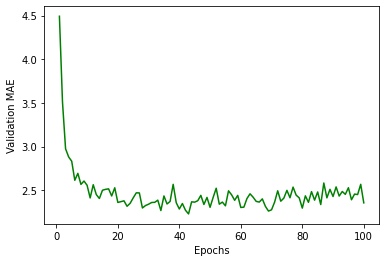

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Con base a las gráficas previas, podemos observar que, aproximadamente a partir de la época 50, el modelo deja de mejorar y comienza a presentarse una disminución en su rendimiento.

# **Re-entrenamiento y evaluación del modelo final**

Una vez que se seleccionó el modelo tomando como base su rendimiento en la validación cruzada, una práctica recomendada es volver a entrar la arquitectura con los mismos parámetros con los que se generó el modelo seleccionado y con el conjunto de entrenamieto original.

In [ ]:
# Instanciamos de nueva cuenta el modelo
model = build_model()
# Entrenamos el modelo en el conjunto de entrenamiento original
model.fit(train_data_std, train_targets,
          epochs=45, batch_size=1, verbose=0)
#Evaluamos el modelo final
test_mse_score, test_mae_score = model.evaluate(test_data_std, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 16.6486 - mae: 2.4315


In [ ]:
test_mae_score

2.4315226078033447

In [ ]:
test_data_std.shape

(102, 13)

In [ ]:
model.predict(test_data_std)

array([[ 7.2614136],
       [18.808659 ],
       [21.267992 ],
       [30.76139  ],
       [24.01605  ],
       [23.75187  ],
       [28.569239 ],
       [21.393482 ],
       [18.567024 ],
       [21.619461 ],
       [19.789871 ],
       [17.503883 ],
       [15.170285 ],
       [42.992    ],
       [19.16216  ],
       [19.762444 ],
       [24.818434 ],
       [18.0696   ],
       [19.60361  ],
       [24.958141 ],
       [10.81471  ],
       [12.267764 ],
       [20.921814 ],
       [17.564222 ],
       [18.998215 ],
       [22.900455 ],
       [28.397148 ],
       [28.27703  ],
       [11.364972 ],
       [19.335814 ],
       [20.174587 ],
       [13.154277 ],
       [32.92233  ],
       [23.46398  ],
       [18.40663  ],
       [ 7.545478 ],
       [16.855438 ],
       [16.99159  ],
       [20.633009 ],
       [25.019249 ],
       [31.255878 ],
       [27.483318 ],
       [13.212827 ],
       [43.58626  ],
       [28.577702 ],
       [24.847408 ],
       [27.200577 ],
       [18.44

NOTA: La información presentada en este notebook, fue tomada de https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb, La única variación sutil del presente notebook con respecto a la fuente original, tiene que ver con la descripción de ciertas partes del código.